In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_library import LinearRegression


In [2]:
df = pd.read_csv('./dataset/linear_regression_dataset.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [5]:
def z_score_normalization(df):
  mean = df.mean()
  std = df.std()
  df_norm = (df - mean)/std
  return df_norm

In [6]:
df_norm = z_score_normalization(df)

In [7]:
X = df_norm.drop('Performance Index', axis=1)
Y = df_norm['Performance Index']

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
model = LinearRegression(alpha=0.01, epochs=1000)
model.fit(X, Y)

Epoch 0: Cost 0.49018040359705745
Epoch 100: Cost 0.07150854772710498
Epoch 200: Cost 0.014596087699242455
Epoch 300: Cost 0.006847210079622307
Epoch 400: Cost 0.005790485398123758
Epoch 500: Cost 0.0056461514933109835
Epoch 600: Cost 0.005626406891777912
Epoch 700: Cost 0.005623701748828536
Epoch 800: Cost 0.005623330572184396
Epoch 900: Cost 0.0056232795681036936


(array([0.38447908, 0.91929692, 0.01595353, 0.04241934, 0.02892895]),
 np.float64(-5.5253412956091137e-17))

In [13]:
y_pred = model.predict(X)

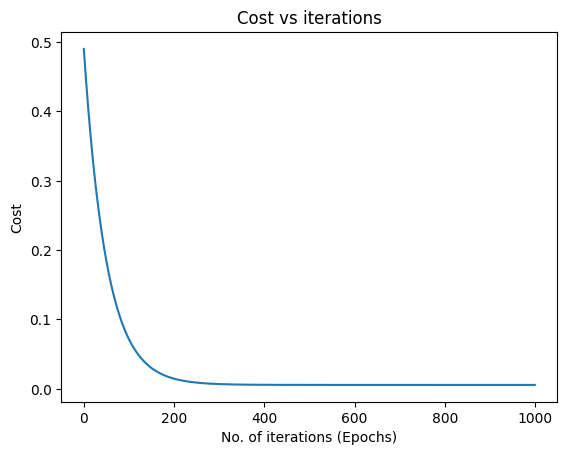

In [14]:
model.plot_cost()

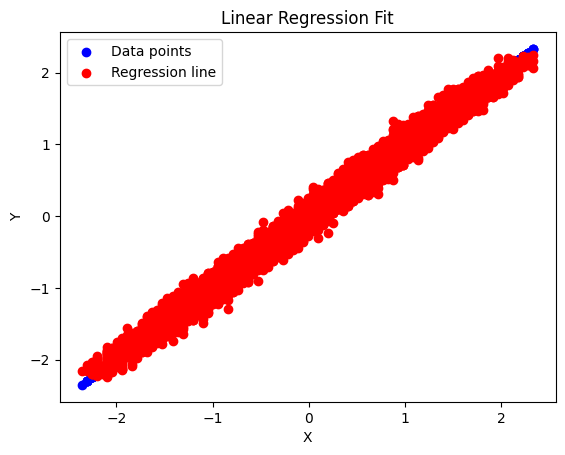

In [15]:
model.plot_regression_line(X, Y)

In [16]:
model.evaluation_metrics(Y, y_pred)

R2 Score: 0.9887523300889919
Mean Squared Error: 0.011246545144017024
Root Mean Squared Error: 0.1060497295801221
Mean Absolute Error: 0.08418883454203828


(np.float64(0.9887523300889919),
 np.float64(0.011246545144017024),
 np.float64(0.1060497295801221),
 np.float64(0.08418883454203828))